<a href="https://colab.research.google.com/github/berkantbayraktar/Temperature-Prediction-w-LSTM/blob/master/CENG501_Spring2021_PA3_Task_temperature_prediction_with_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A Sequence Modeling Pipeline with PyTorch for Weather Prediction
# CENG501 - Spring 2021 - PA3

In this task, you are expected to experience and demonstrate a pipeline for training a recurrent network.

## 1 Import Modules

In [125]:
import torch
import torch.nn as nn
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

## 2 Dataset

We will use the hourly temperature data for Basel (why Basel? because it was freely available) from [meteoblue](https://www.meteoblue.com/en/weather/archive/export/basel_switzerland_2661604?daterange=2021-06-01%20-%202021-06-23&domain=NEMSAUTO&params%5B%5D=temp2m&min=2021-06-16&max=2021-06-23&utc_offset=2&timeResolution=hourly&temperatureunit=CELSIUS&velocityunit=KILOMETER_PER_HOUR&energyunit=watts&lengthunit=metric&degree_day_type=10%3B30&gddBase=10&gddLimit=30) between 1 June 2021 and 23 June 2021. Here is a description of how you should prepare your dataset from this raw file:

* Raw data is available [here](http://kovan.ceng.metu.edu.tr/~sinan/DL/Basel_weather.xlsx) as an XLSX file which was downloaded from [meteoblue](https://www.meteoblue.com/en/weather/archive/export/basel_switzerland_2661604?daterange=2021-06-01%20-%202021-06-23&domain=NEMSAUTO&params%5B%5D=temp2m&min=2021-06-16&max=2021-06-23&utc_offset=2&timeResolution=hourly&temperatureunit=CELSIUS&velocityunit=KILOMETER_PER_HOUR&energyunit=watts&lengthunit=metric&degree_day_type=10%3B30&gddBase=10&gddLimit=30).

* Load the file into Python as a NumPy array using [Pandas](https://pp4e-book.github.io/chapters/ch10_scientific_libraries.html#data-handling-analysis-with-pandas). Filter out unnecessary information at the top and convert the first column to an hour index, starting at 0 and finishing at 551.

* Split the data into two: A training set from the values between 1 June 2021 and 16 June 2021 (inclusive). A test set from the remaining values.

* For each set, slide a time window of six hours and with a stride of 1, and for each position of the window, create a training input-output pair as follows:

  $(\mathbf{x}_i = <T_i, T_{i+1}, T_{i+2}, T_{i+3}, T_{i+4}>, y_i = T_{i+5}),$
 
  where $T_i$ is the temperature at hour index $i$. 


In [126]:
# Load the dataset.
df = pd.read_csv("data/Basel_weather.csv")

In [127]:
# Clean the dataset
df = df[9:]
df.reset_index(drop=True, inplace=True)
df = df.rename(columns={'location': 'time', 'Basel': 'temperature'})
df = df.astype({'temperature': float})

In [128]:
# Split the dataset
train_df = df[:360]
test_df = df[360:]

In [129]:
train_df.tail()

,time,temperature
355,20210615T1900,28.970530
356,20210615T2000,28.260529
357,20210615T2100,27.060530
358,20210615T2200,25.770529
359,20210615T2300,24.240528


In [130]:
test_df.tail()

,time,temperature
547,20210623T1900,20.850529
548,20210623T2000,18.860529
549,20210623T2100,17.820530
550,20210623T2200,17.190529
551,20210623T2300,16.560530


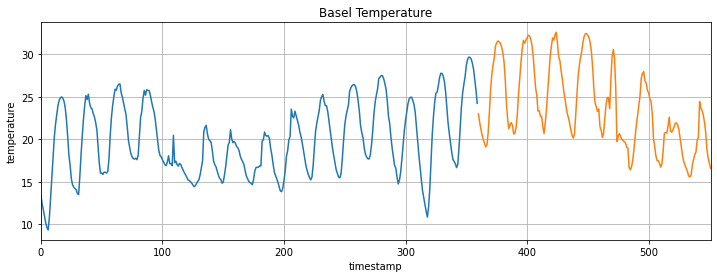

In [131]:
plt.figure(figsize=(12,4))
plt.title('Basel Temperature')
plt.ylabel('temperature')
plt.xlabel('timestamp')
plt.grid(True)
plt.autoscale(axis='x',tight=True)
plt.plot(train_df['temperature'])
plt.plot(test_df['temperature'])
plt.show()

In [132]:
y_train = train_df['temperature'].values.astype(float)
y_test = test_df['temperature'].values.astype(float)

In [133]:
# Instantiate a scaler with a feature range from -1 to 1
scaler = MinMaxScaler(feature_range=(-1, 1))
# Normalize the training set
train_norm = scaler.fit_transform(y_train.reshape(-1, 1))

In [134]:
# Convert train_norm from an array to a tensor
train_norm = torch.FloatTensor(train_norm).view(-1)

In [135]:
def generate_data(seq, window_size=6):
    data = []
    for i in range(len(seq) - window_size + 1):
        xi = seq[i:i+window_size-1]
        yi = seq[i+window_size-1]
        data.append((torch.tensor(xi),torch.tensor(yi)))
    return data
    

In [136]:
train_data = generate_data(train_norm)
print("len train_data : ", len(train_data))

len train_data :  355


/home/bbayraktar/anaconda3/envs/pytorch-jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  


In [137]:
# Write your code here
# If you like, you can create subsections here and split your code into 
# meaningfully separate parts, e.g. "Loading the dataset", "Cleaning the dataset",
# "Splitting the dataset"..

## 3 Your LSTM Definition

Implement your own LSTM "cell" using PyTorch without using PyTorch's LSTM implementation. However, you can use the backpropagation mechanism of PyTorch and therefore, you just need to worry about the feedforward processing.

Your implementation should not be limited to the weather prediction problem and be general. For the sake of simplicity, you can just implement a single-layer LSTM cell.

In [138]:
# Your LSTM Definition 
import torch
class MyLSTM(torch.nn.Module):
    def __init__(self, input_size, hidden_size):
        """
          input_size: the size of the input at a time step.
          hidden_size: the number of neurons in the hidden state.
        """
        super().__init__()

        ## @TODO: Create parameters in LSTM and initialize them
        pass 
    
    def forward(self, X):
        """
          X: A batch of sequences where each sequence has L time steps and for each time step, 
          it has input_size many elements. Has shape (B, L, input_size) with B being 
          the batch size.

          Output: Tuple (h, c) where h is the tensor holding the hidden state for L
          time steps, and c is the tensor holding the memory state for L time steps. 
          Both have shape (B, L, hidden_size).
        """
        ## @TODO: Process X over L timesteps and return the output
        pass

## 4 Your Sequence Model

In [139]:
class MyWeatherPredictor(torch.nn.Module):

    def __init__(self, input_dim, hidden_dim, out_dim=1):
        super().__init__()
        np.random.seed(501)
        torch.manual_seed(501)
        
        self.hidden_size = hidden_dim
        
        # Add an LSTM layer:
        self.lstm = nn.LSTM(input_dim,hidden_dim)
        
        # Add a fully-connected layer:
        self.linear = nn.Linear(hidden_dim,out_dim)
        
        # Initialize h0 and c0:
        self.hidden = (torch.zeros(1,1,hidden_dim),
                       torch.zeros(1,1,hidden_dim))

        # @TODO: Create an instance of your LSTM model and a FC layer
        # that maps the last hidden state to the output that you wish to 
        # estimate
        

    def forward(self, X):
        # @TODO: Forward pass through LSTM and FC layer to estimate
        # the target
        lstm_out, self.hidden = self.lstm(
            X.view(len(X), 1, -1), self.hidden)
        prediction = self.linear(lstm_out.view(len(X),-1))[-1]
        return prediction

## 5 Your Trainer

Implement your training function here. You can use functions we have defined in the previous assignments.

## 6 Train Your Model

Create an instance of your model, a suitable loss function, a suitable optimizer and call the training function with suitable hyperparameters (learning rate, batch size, hidden size etc.).

In [140]:
torch.manual_seed(501)
model = MyWeatherPredictor(1,100)
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

epochs = 50
loss_values = []
start_time = time.time()
for i in range(epochs):
    
    # tuple-unpack the train_data set
    for seq, y_train in train_data:
        
        # reset the parameters and hidden states
        optimizer.zero_grad()
        model.hidden = (torch.zeros(1,1,model.hidden_size),
                        torch.zeros(1,1,model.hidden_size))
        
        y_pred = model(seq)
        
        loss = criterion(y_pred, y_train)
        
        loss.backward()
        optimizer.step()
    loss_values.append(loss.item())
    # print training result
    print(f'Epoch: {i+1:2} Loss: {loss.item():10.8f}')

print(f'\nDuration: {time.time() - start_time:.0f} seconds')

/home/bbayraktar/anaconda3/envs/pytorch-jupyter/lib/python3.7/site-packages/torch/nn/modules/loss.py:528: UserWarning: Using a target size (torch.Size([])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch:  1 Loss: 0.00102341
Epoch:  2 Loss: 0.00563561
Epoch:  3 Loss: 0.02679177
Epoch:  4 Loss: 0.04292702
Epoch:  5 Loss: 0.04911541
Epoch:  6 Loss: 0.05038243
Epoch:  7 Loss: 0.04989696
Epoch:  8 Loss: 0.04883597
Epoch:  9 Loss: 0.04758163
Epoch: 10 Loss: 0.04625352
Epoch: 11 Loss: 0.04488795
Epoch: 12 Loss: 0.04349508
Epoch: 13 Loss: 0.04207626
Epoch: 14 Loss: 0.04063026
Epoch: 15 Loss: 0.03915481
Epoch: 16 Loss: 0.03764750
Epoch: 17 Loss: 0.03610591
Epoch: 18 Loss: 0.03452827
Epoch: 19 Loss: 0.03291338
Epoch: 20 Loss: 0.03126109
Epoch: 21 Loss: 0.02957270
Epoch: 22 Loss: 0.02785109
Epoch: 23 Loss: 0.02610113
Epoch: 24 Loss: 0.02433011
Epoch: 25 Loss: 0.02254762
Epoch: 26 Loss: 0.02076564
Epoch: 27 Loss: 0.01899851
Epoch: 28 Loss: 0.01726231
Epoch: 29 Loss: 0.01557426
Epoch: 30 Loss: 0.01395187
Epoch: 31 Loss: 0.01241182
Epoch: 32 Loss: 0.01096906
Epoch: 33 Loss: 0.00963566
Epoch: 34 Loss: 0.00842023
Epoch: 35 Loss: 0.00732740
Epoch: 36 Loss: 0.00635772
Epoch: 37 Loss: 0.00550806
E

In [141]:
def count_parameters(model):
    params = [p.numel() for p in model.parameters() if p.requires_grad]
    for item in params:
        print(f'{item:>6}')
    print(f'______\n{sum(params):>6}')
    
count_parameters(model)

   400
 40000
   400
   400
   100
     1
______
 41301


## 7 Analyze the Results

### 7.1 Visualize the Loss Curve

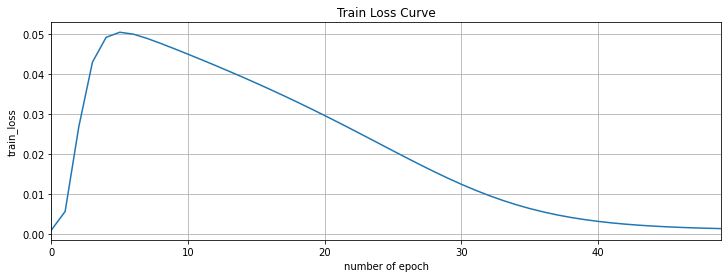

In [142]:
plt.figure(figsize=(12,4))
plt.title('Train Loss Curve')
plt.ylabel('train_loss')
plt.xlabel('number of epoch')
plt.grid(True)
plt.autoscale(axis='x',tight=True)
plt.plot(loss_values)
plt.show()

### 7.2 Quantitative Analysis

Provide a quantitative analysis of your model on the test set using root mean squared error.

In [ ]:
# Your implementation comes here

pass

### 7.3 Qualitative Analysis

Plot test data and your predictions over a sliding window. Plot two versions of your predictions: (i) Window sliding on the test data and you plot the predictions only. (ii) After obtaining the first prediction on the test data, window sliding over the predictions.

In [ ]:
# Your implementation comes here

pass

## 8 Tune Your Model

Tune the following aspects for your model and provide a figure or a table in each case:

- Number of hidden neurons.
- Learning rate.
- Batch size.

Report the performance of the best model after tuning.